**Introduction**

My part of our project was to find out what the most **dangerous** and **safest** neighborhood is in Pittsburgh based off of **total crimes** and **population**. When trying to survive a deadly global pandemic, its very important that you are living in a **safe** neighborhood because when **food**, **water**, and **supplies** get low, people will start getting **violent**, breaking into homes and **stealing** things.

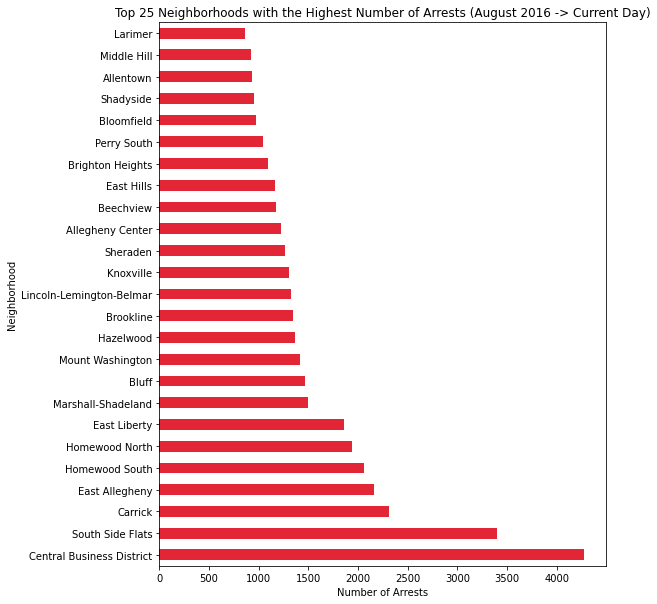

In [81]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt  
%matplotlib inline 

# Read the crime data from the CSV file
crime_data = pd.read_csv("updatedCrime.csv")

# Create a DataFrame to count the number of arrests by neighborhood
arrests = crime_data["INCIDENTNEIGHBORHOOD"].value_counts().head(25)

# Set the size of the bar graph
fig, ax = plt.subplots(figsize=(8, 10))

# Plot the top 25 neighborhoods with the highest number of arrests
arrests.plot(kind="barh", ax=ax, color='#e32636')
plt.xlabel("Number of Arrests")
plt.ylabel("Neighborhood")
plt.title("Top 25 Neighborhoods with the Highest Number of Arrests (August 2016 -> Current Day)")
plt.show()

This bar graph shows the **25** neighborhoods with the highest crime rate. The worst neighborhood was **Central Business District** with over **4000** arrests from August of 2016 to present time. Not too far behind was **South Side Flats** followed by **Carrick**, **East Allegheny**, and **Homewood South** which all had over **2000** arrests.

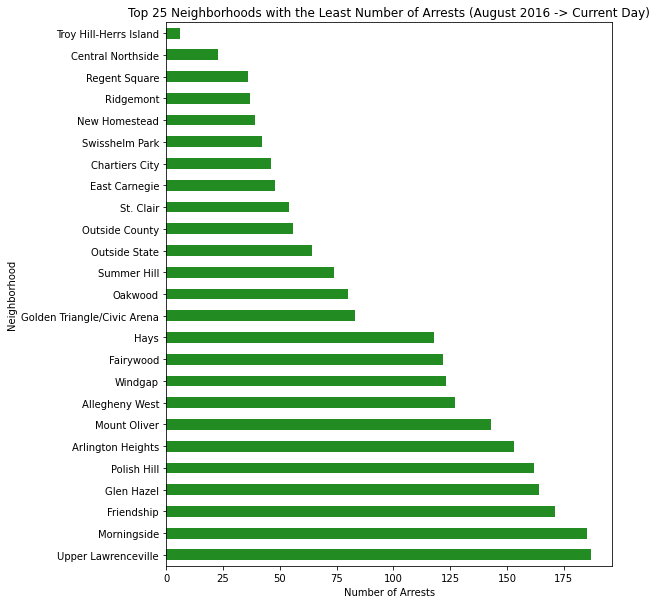

In [82]:
# Create a DataFrame to count the number of arrests by neighborhood
arrests = crime_data["INCIDENTNEIGHBORHOOD"].value_counts().tail(25)

# Set the size of the bar graph
fig, ax = plt.subplots(figsize=(8, 10))

# Plot the top 25 neighborhoods with the lowest number of arrests
arrests.plot(kind="barh", ax=ax, color='#228b22')
plt.xlabel("Number of Arrests")
plt.ylabel("Neighborhood")
plt.title("Top 25 Neighborhoods with the Least Number of Arrests (August 2016 -> Current Day)")
plt.show()

This bar graph shows the **25** neighborhoods with the lowest crime rate. The best neighborhood was **Troy Hill-Herrs Island** with less than **25** arrests from August of 2016 to present time. Not too far behind was **Central Northside** followed by **Regent Square**, **Ridgemont**, and **New Homestead** which all had under **50** arrests.

In [83]:
import pandas as pd

# Read population data
neighborhoodPopulation = pd.read_csv("updatedNeighborhoodPopulation.csv")
populationDF = neighborhoodPopulation[['Neighborhood', 'Population (2010)']]

# Rename the "Population (2010)" column to "Population"
populationDF = populationDF.rename(columns={'Population (2010)': 'Population'})

# Read crime data
arrests = crime_data["INCIDENTNEIGHBORHOOD"].value_counts()
crimeDF = pd.DataFrame(arrests).reset_index()
crimeDF.columns = ['Neighborhood', 'Arrests']

# Merge dataframes
mergeDF = pd.merge(populationDF, crimeDF, on='Neighborhood')

# Print the merged dataframe
mergeDF.head()

,Neighborhood,Population,Arrests
0,Allegheny Center,933,1229
1,Allegheny West,462,127
2,Allentown,2500,933
3,Arlington,1869,302
4,Arlington Heights,244,153


Now that all of the data of the population and crimes has been put into one dataframe, we can now find the **crime rate** in each neighborhood **per 100 people**. To do this, we need to divide the number of arrests that occured by the population of the neighborhood and then multiply by 100 for it to become the crime rate per every 100 people. What I basically did was **standardize the data** where the highest and lowest crime rates wont be just mainly neighborhoods with the most and least amount of people.

In [84]:
mergeDF["Crime Rate (Per 100 People)"] = mergeDF["Arrests"] / mergeDF["Population"] * 100

mergeDF.head()

,Neighborhood,Population,Arrests,Crime Rate (Per 100 People)
0,Allegheny Center,933,1229,131.725616
1,Allegheny West,462,127,27.489177
2,Allentown,2500,933,37.320000
3,Arlington,1869,302,16.158373
4,Arlington Heights,244,153,62.704918


Now this is a better representation of truly how dangerous each neighborhood is. One slight issue that you might see is that for a place like Allegheny Center, the total crimes is over the population and the reason for that is because the total crimes are from 2016 to current day which means that the crimes can accumulate over time and surpass the total population number.

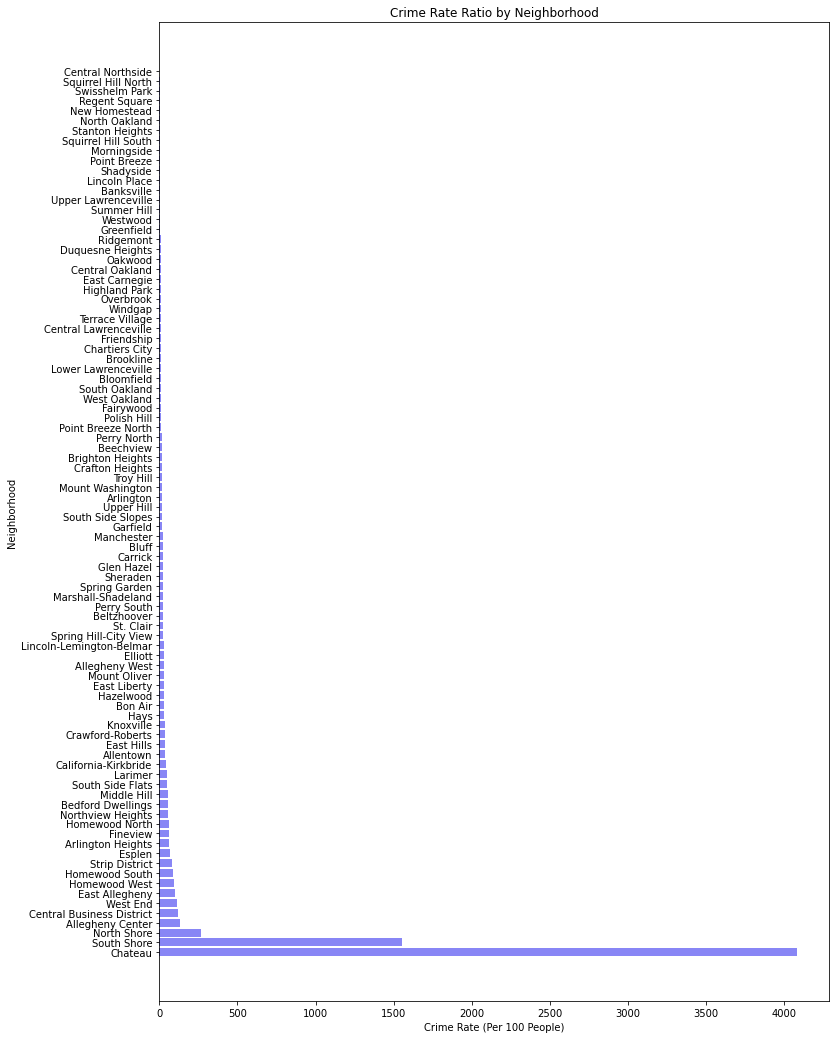

In [85]:
# Sort the DataFrame by CrimeRatio in descending order
mergeDF = mergeDF.sort_values(by='Crime Rate (Per 100 People)', ascending=False)

# Plot the bar graph
plt.figure(figsize=(12, 18))
plt.barh(mergeDF['Neighborhood'], mergeDF['Crime Rate (Per 100 People)'], color='#8886F5')
plt.xlabel('Crime Rate (Per 100 People)')
plt.ylabel('Neighborhood')
plt.title('Crime Rate Ratio by Neighborhood')
plt.show()

Holy Smokes, those numbers are crazy. It looks like we have a couple outliers that are skewing the data, making it hard to read. **Chateau**, **South Shore**, and **North Shore** all have much higher crime rates than the rest of the neighborhoods. What we can do to fix this is to remove those outliers to be able to compare the other neighborhoods better. So lets do it!!!

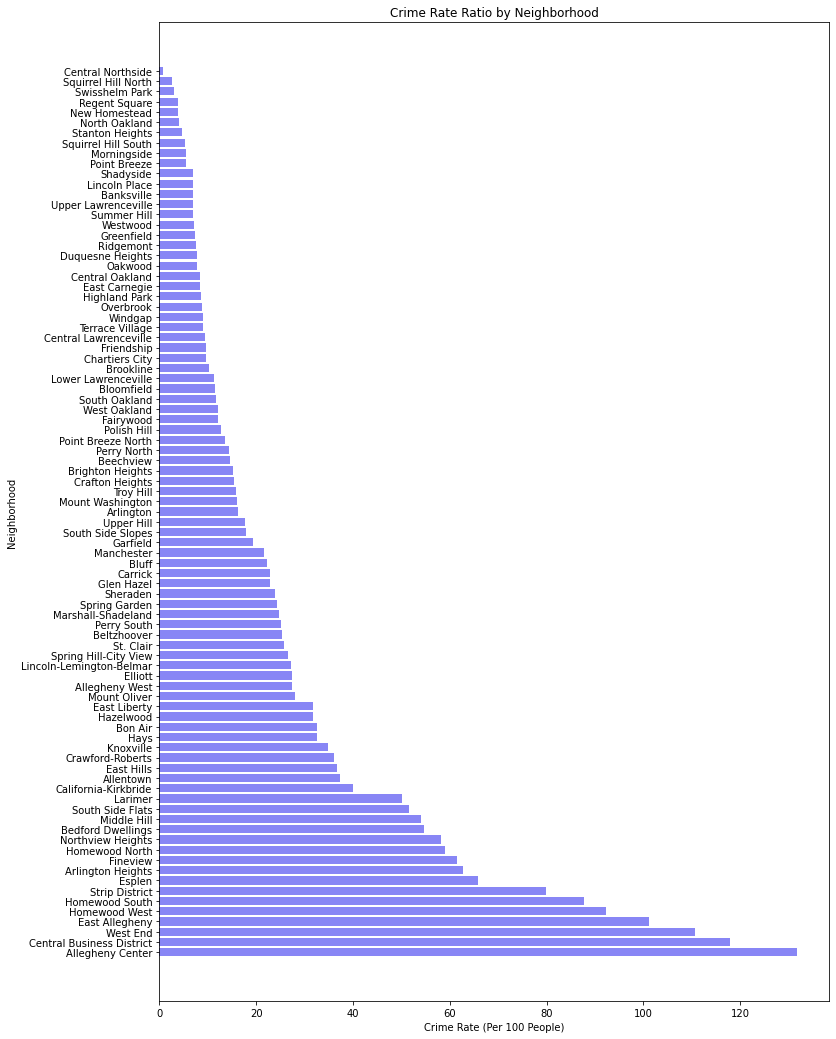

In [79]:
filteredDF = mergeDF.nlargest(3, 'Crime Rate (Per 100 People)', 'all')
filteredDF = mergeDF[~mergeDF['Neighborhood'].isin(filteredDF['Neighborhood'])]

# Sort the DataFrame by Crime Ratio in descending order
filteredDF = filteredDF.sort_values(by='Crime Rate (Per 100 People)', ascending=False)
# Plot the bar graph
plt.figure(figsize=(12, 18))
plt.barh(filteredDF['Neighborhood'], filteredDF['Crime Rate (Per 100 People)'], color='#8886F5')
plt.xlabel('Crime Rate (Per 100 People)')
plt.ylabel('Neighborhood')
plt.title('Crime Rate Ratio by Neighborhood')
plt.show()

Now that looks a lot better. The top 3 best neighborhoods with the lowest crime rate ended up being **Central Northside**, **Squirrel Hill North**, and **Swisshelm Park**.

**Conculsion**

In conclusion after looking at the data with total crimes and population in each neighborhood merged together to create the Crime Rate Ratio, we were able to find the best and worst neighborhoods to live in based off of crime rate. The 3 worst neighborhoods to live in were **Chateau**, **South Shore**, and **North Shore** which all had staggeringly high Crime Rates well over 100 per 100 people. The 3 best neighborhoods to live in were **Central Northside**, **Squirrel Hill North**, and **Swisshelm Park** with their crime rates being well under 20 per 100 people.   